In [12]:
import numpy as np
import pandas as pd
import requests
from io import StringIO
import matplotlib

In [13]:
%matplotlib inline

In [14]:
def get_word(word):
    word = word.strip()
    word = word.lower()
    word = word.replace(" ", "_")
    first_five = "/".join(word[:5])
    request = requests.get("https://projects.fivethirtyeight.com/reddit-data/{}/{}.csv".format(first_five, word))
    return pd.read_csv(StringIO(request.text))

def get_words(words):
    frames = [get_word(words[0])]
    for word in words[1:]:
        frames.append(get_word(word).ngram_fraction)
    df = pd.concat(frames, axis=1)
    df.columns = ["date"] + [x.strip().replace(" ", "_") for x in words]
    df.set_index("date", inplace=True)
    return df

In [5]:
data = get_word("African American")
data.tail()

,date,ngram_fraction
2873,2015-08-27,0.000003
2874,2015-08-28,0.000002
2875,2015-08-29,0.000003
2876,2015-08-30,0.000003
2877,2015-08-31,0.000003


In [6]:
data = get_word("meh")
data.tail()

,date,ngram_fraction
2873,2015-08-27,0.000030
2874,2015-08-28,0.000031
2875,2015-08-29,0.000031
2876,2015-08-30,0.000030
2877,2015-08-31,0.000031


In [18]:
data = get_words(["monocultural", "mono-cultural", "mono cultural", "monoculturals", 
                  "biracial", "bi-racial", "bi racial", "biracials", 
                 "interracial, inter-racial", "inter racial", "interracials", 
                 "multiracial", "multi-racial", "multi racial", "multiracials", 
                 "multiethnic", "multi-ethnic", "multi ethnic", "multiethnics", 
                 "multicultural", "multi-cultural", "multi cultural", "multiculturals", 
                 "multiculturalism", "multi-culturalism", "multi culturalism", "multiculturalisms"])

AttributeError: 'DataFrame' object has no attribute 'ngram_fraction'

In [10]:
data.head()

,African_American,hispanic,latino,arab
date,,,,
2007-10-15,0,0,0,0.000000
2007-10-16,0,0,0,0.000000
2007-10-17,0,0,0,0.000017
2007-10-18,0,0,0,0.000028
2007-10-19,0,0,0,0.000031


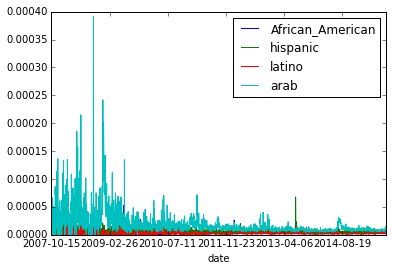

In [11]:
data.plot()